In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("Data/loan.csv")
df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


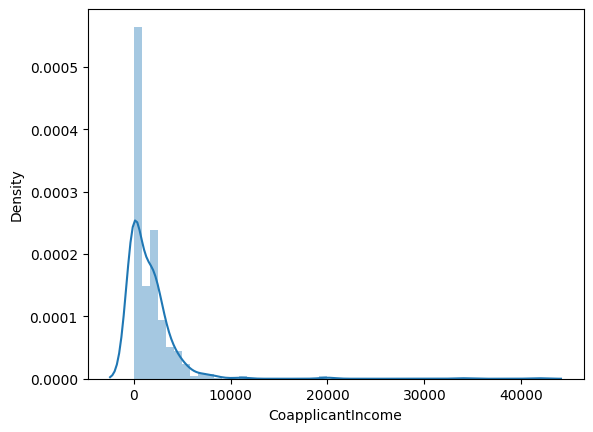

In [4]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [5]:
q1= df["CoapplicantIncome"].quantile(0.25)
q3= df["CoapplicantIncome"].quantile(0.75)

IQR= q3-q1

In [6]:
min_range= q1 - (1.5*IQR)
max_range= q3 + (1.5*IQR)

min_range , max_range

(-3445.875, 5743.125)

In [7]:
df=df[df["CoapplicantIncome"]<=max_range]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


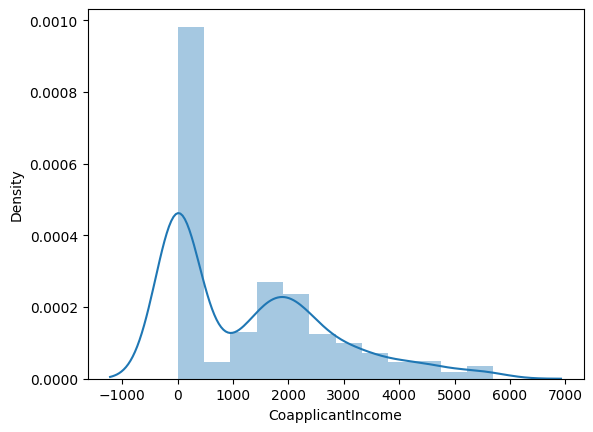

In [8]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [9]:
from sklearn.preprocessing import FunctionTransformer

In [10]:
ft = FunctionTransformer(func=np.log1p)

In [11]:
ft.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [12]:
df["CoapplicantIncome_tf"]=ft.transform(df[["CoapplicantIncome"]])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\1169060631.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\1169060631.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_tf'])


<Axes: title={'center': 'After'}, xlabel='CoapplicantIncome_tf', ylabel='Density'>

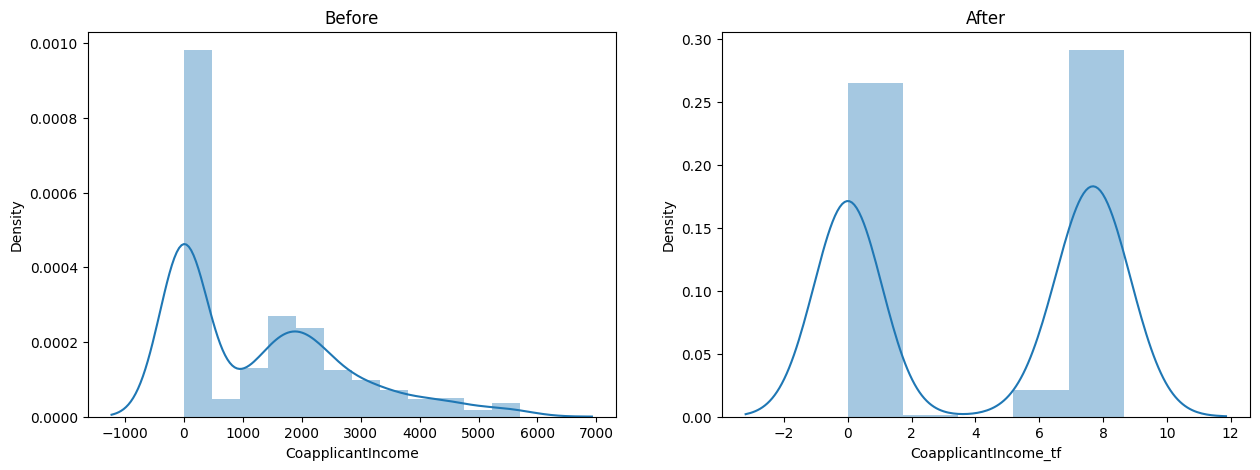

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('After')
sns.distplot(df['CoapplicantIncome_tf'])

In [14]:
ft1 = FunctionTransformer(func=lambda x : x**2)
ft1.fit(df[["CoapplicantIncome"]])

FunctionTransformer(func=<function <lambda> at 0x00000240436494E0>)

In [15]:
df["CoapplicantIncome_tf1"]=ft1.transform(df[["CoapplicantIncome"]])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\2152441090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13940\2152441090.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_tf1'])


<Axes: title={'center': 'After'}, xlabel='CoapplicantIncome_tf1', ylabel='Density'>

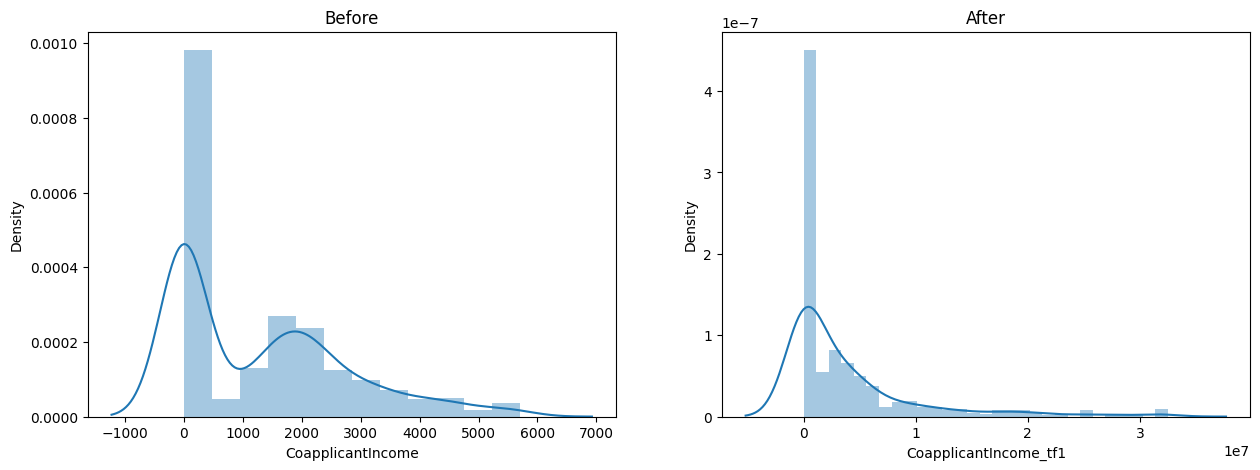

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('After')
sns.distplot(df['CoapplicantIncome_tf1'])